
Sample records from the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Key information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-nu

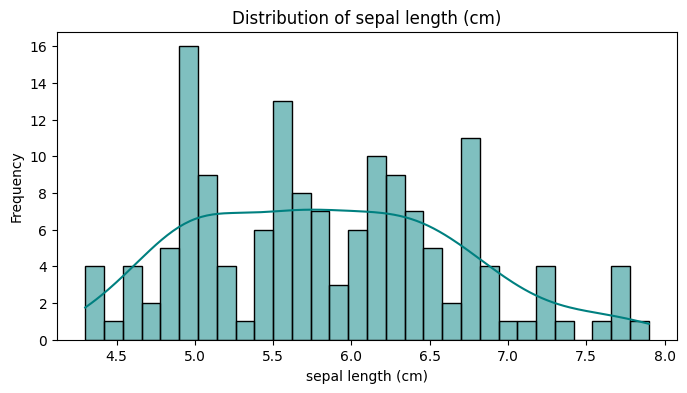

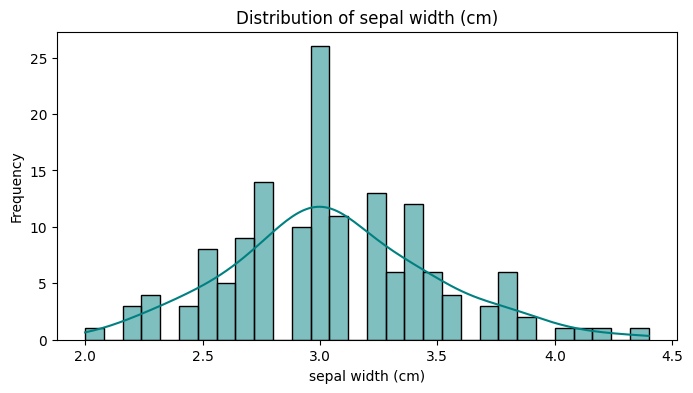

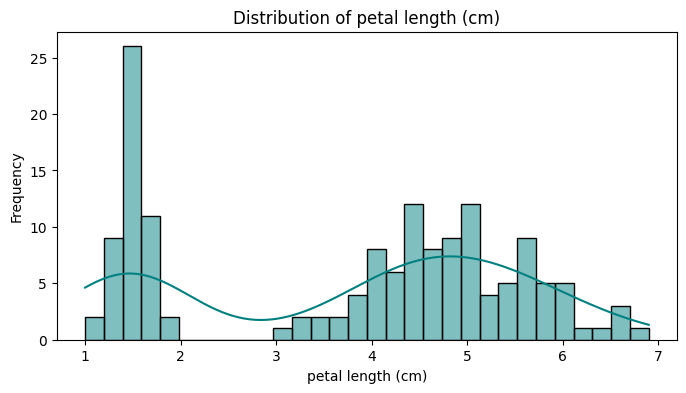

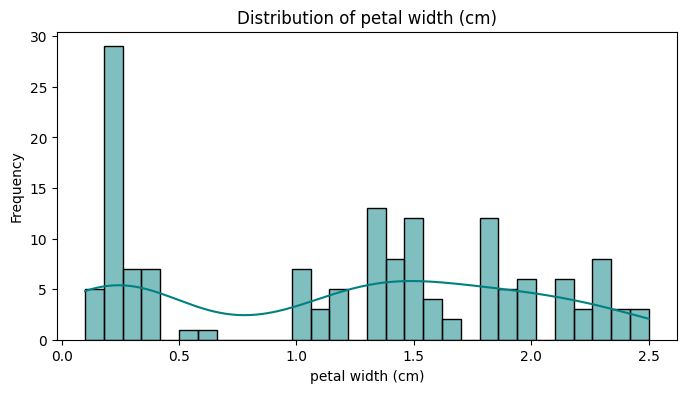

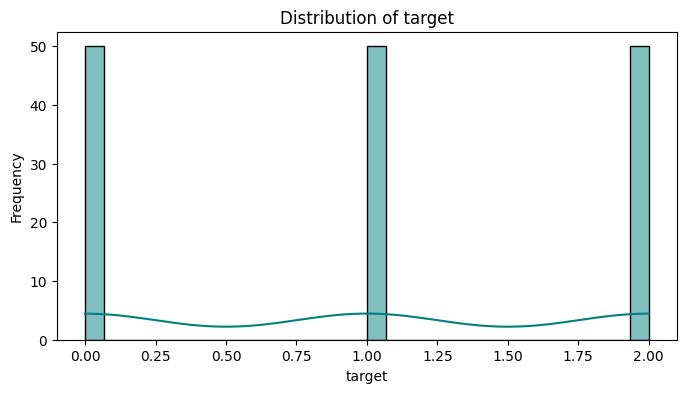

<ipython-input-2-a1cb65384d97>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=iris_df[col], palette='viridis', order=iris_df[col].value_counts().index)


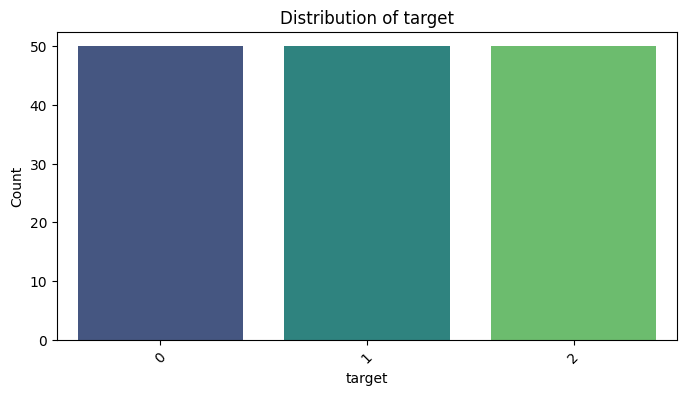

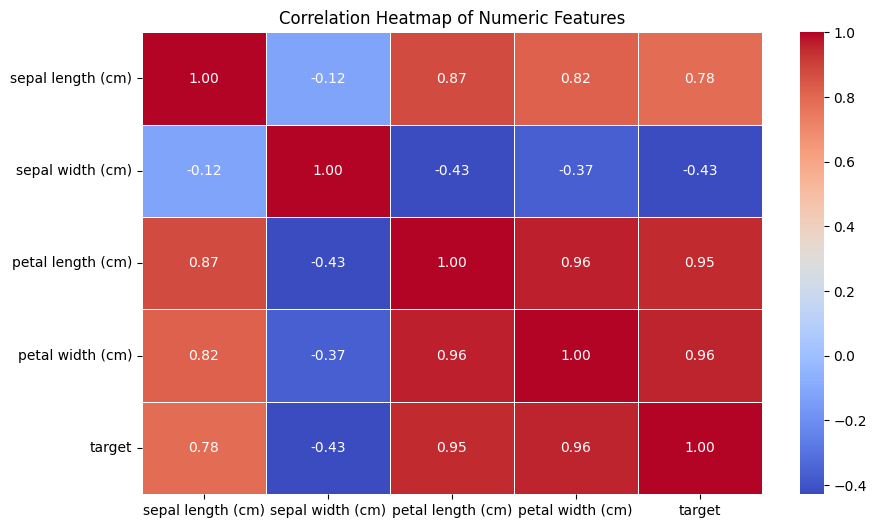

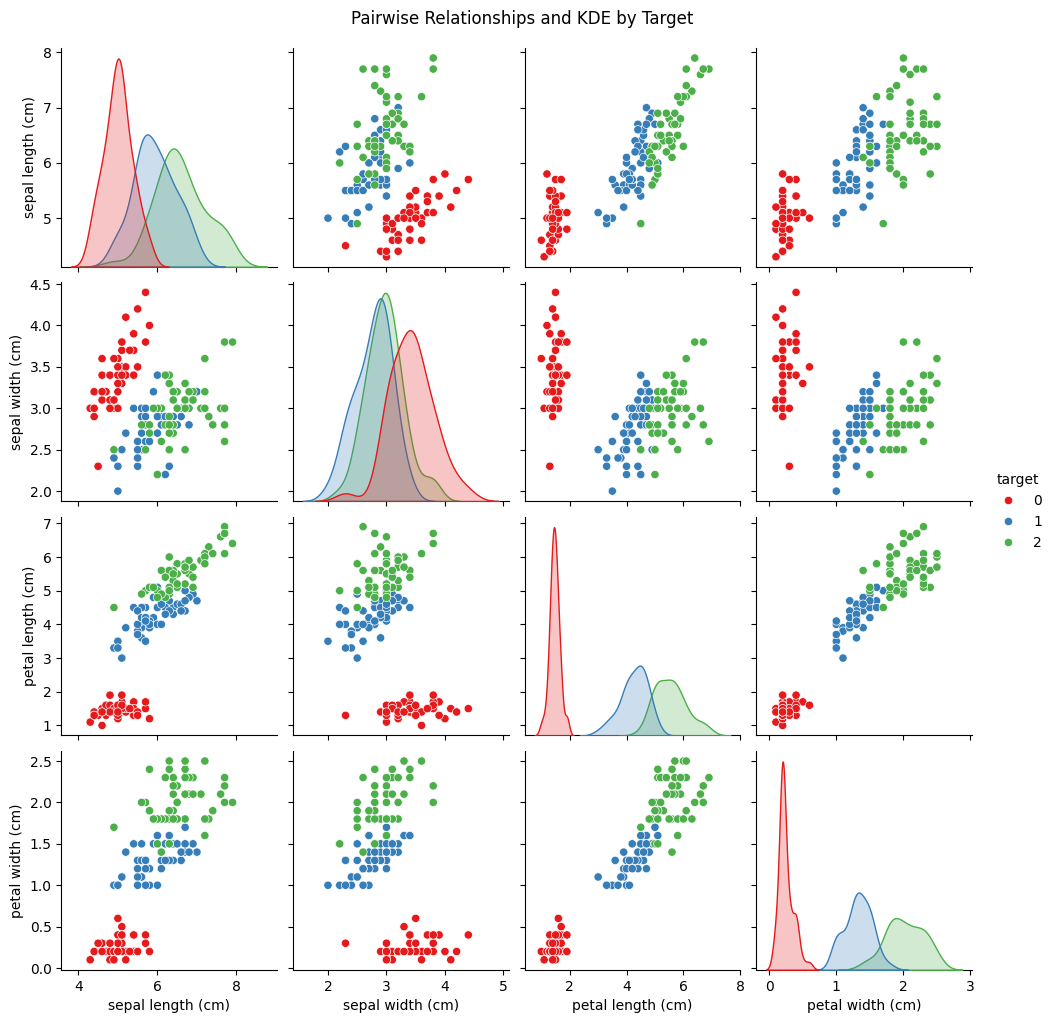

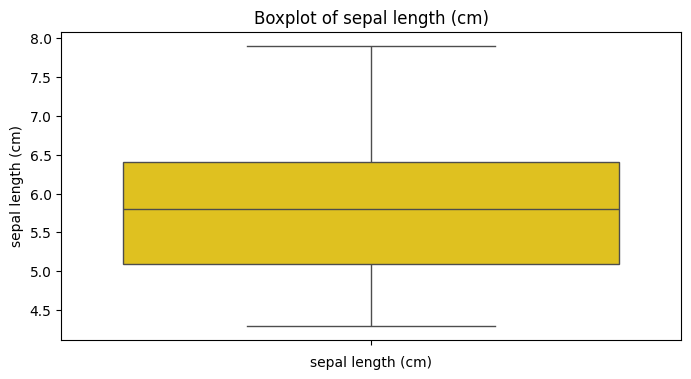

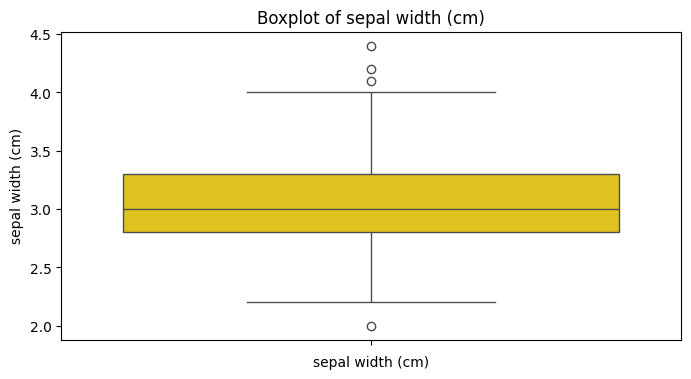

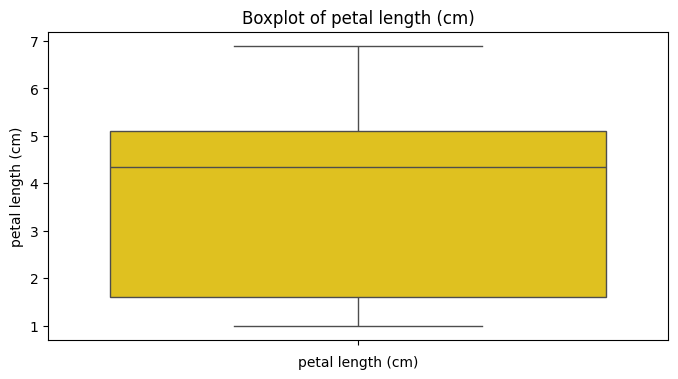

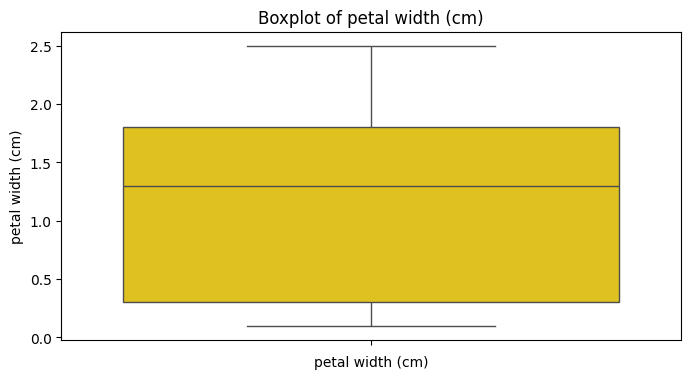

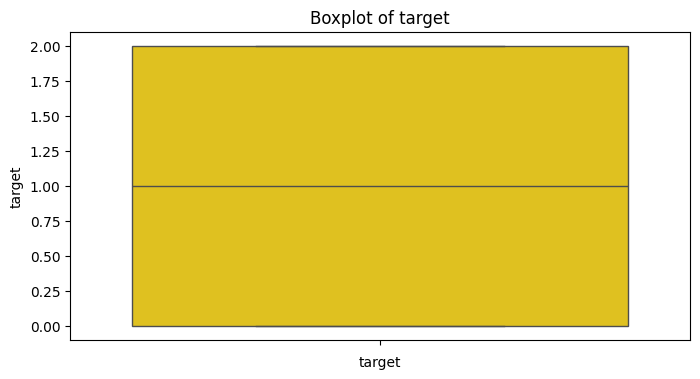


Explained variance ratio of PCA components: [0.76740358 0.18282727]


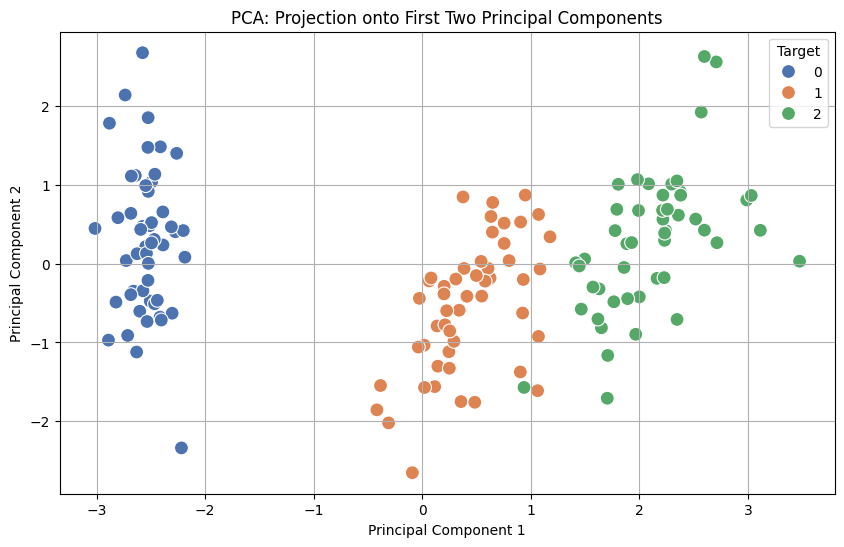


EDA and Advanced Analysis (PCA) Complete!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the built-in Iris dataset
data = load_iris(as_frame=True)
iris_df = data['frame']

# Display the first few rows and general information
print("\nSample records from the Iris dataset:")
print(iris_df.head())

print("\nKey information about the dataset:")
iris_df.info()

print("\nStatistical summary of numeric columns:")
print(iris_df.describe())

# Check for missing values
print("\nChecking for missing values across columns:")
print(iris_df.isnull().sum())

# Shape of the dataset
print(f"\nThe dataset contains {iris_df.shape[0]} rows and {iris_df.shape[1]} columns.")

# Data Types of Columns
print("\nColumn data types:")
print(iris_df.dtypes)

# Univariate Analysis: Distribution of numerical features
numerical_columns = iris_df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(iris_df[col].dropna(), kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Count plot for categorical features
categorical_columns = ['target']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=iris_df[col], palette='viridis', order=iris_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

# Correlation Analysis for numerical features
if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 6))
    correlation_matrix = iris_df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# Pairwise relationships with hue for target
sns.pairplot(iris_df, hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Pairwise Relationships and KDE by Target', y=1.02)
plt.show()

# Outlier Detection: Boxplots for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(iris_df[col], color='gold')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Advanced Task: Principal Component Analysis (PCA)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df[numerical_columns])
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
pca_df = pd.DataFrame(data=iris_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['target'] = iris_df['target']

print("\nExplained variance ratio of PCA components:", pca.explained_variance_ratio_)

# Scatter plot of PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='target', palette='deep', s=100)
plt.title('PCA: Projection onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()

print("\nEDA and Advanced Analysis (PCA) Complete!")
